找到趋势形代表：'20110412', 'planetlab2_uta_edu_uw_oneswarm'
找到周期型代表：'20110403', 'planetlab-1_cse_ohio-state_edu_arizona_nest'
找到平稳型代表：'20110303', 'ait05_us_es_root'

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import os
import math

In [6]:
data_dir = '../data/planetlab'

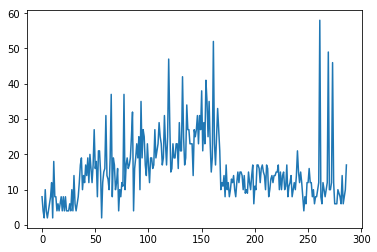

In [502]:
csv = os.path.join(data_dir, '20110412', 'planetlab2_uta_edu_uw_oneswarm')
df = pd.read_csv(csv)
df.columns = ['load']
df = df.dropna()
plt.plot(df)
ts = df['load']

In [286]:
# 频谱分析
def spectrum_analyse(ts):
    ts_dft = np.fft.fft(ts)
    m = len(ts_dft) / 2
    Q = ts_dft**2 / m
    
    H = np.array([])
    for i in range(1, math.ceil(len(Q)/2)):
        h = abs((Q[i] - Q[i+1]) + (Q[i] - Q[i-1]))
        H = np.append(H, h)
    H_mean = np.mean(H)
    H_std = np.std(H)
    is_period, period = False, 0
    for i in range(1, len(H)):
        if H[i] - H_mean > 3*H_std:
            is_period, period = True, len(H)/(i+1)
    return is_period, period

In [503]:
spectrum_analyse(ts)

(False, 0)

In [355]:
def find_period_load(root):
    res = pd.DataFrame(columns=['filename', 'period'])
    
    for d in os.listdir(root):
        child = os.path.join(root, d)
        print(child)
        if os.path.isdir(child):
            for csv in os.listdir(child)[:1000]:
#                 print(csv)
                csv = os.path.join(child, csv)
                df = pd.read_csv(csv)
                df.columns = ['load']
                df = df.dropna()
                ts = df['load']
                flag, period = spectrum_analyse(ts)
                if flag:
#                     print('find:', csv)
                    res.loc[res.shape[0]+1] = {'filename': csv, 'period': period}
    return res

In [356]:
period_res = find_period_load(data_dir)
period_res.head()

../data/planetlab/20110403
../data/planetlab/.DS_Store
../data/planetlab/20110303
../data/planetlab/20110420
../data/planetlab/20110411
../data/planetlab/20110409
../data/planetlab/20110325
../data/planetlab/20110322
../data/planetlab/20110306
../data/planetlab/20110309
../data/planetlab/20110412


,filename,period
1,../data/planetlab/20110403/planetlab-3_cmcl_cs...,5.958333
2,../data/planetlab/20110403/planetlab-1_cse_ohi...,5.958333
3,../data/planetlab/20110403/planetlab2-santiago...,47.666667
4,../data/planetlab/20110403/node2_lbnl_nodes_pl...,1.986111
5,../data/planetlab/20110403/planetlab-1_dis_uni...,2.269841


In [511]:
period_res.iloc[1]['filename']

'../data/planetlab/20110403/planetlab-1_cse_ohio-state_edu_arizona_nest'

In [504]:
demo = period_res.iloc[1]['filename']
df = pd.read_csv(demo)
df.columns = ['load']
ts = df['load']
spectrum_analyse(ts)

(True, 5.958333333333333)

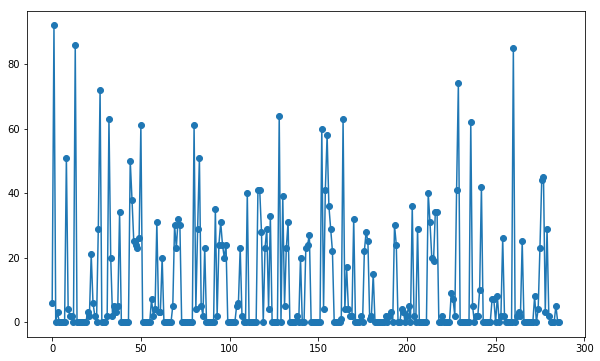

In [521]:
plt.figure(figsize=(10,6))
plt.plot(df, marker='o')

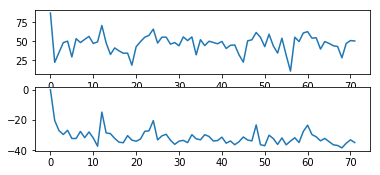

In [523]:
from scipy.fftpack import fft
num_fft = math.ceil(len(ts)/2)
Y = fft(ts, num_fft)

ps = Y**2 / num_fft
cor_x = np.correlate(ts,ts,'same')
cor_X = fft(cor_x, num_fft)
ps_cor = np.abs(cor_X)
ps_cor = ps_cor / np.max(ps_cor)

plt.subplot(311)
plt.plot(20*np.log10(ps[:num_fft//2]))

plt.subplot(312)
plt.plot(20*np.log10(ps_cor[:num_fft//2]))

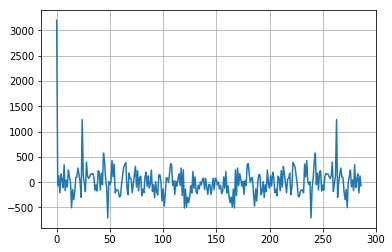

In [507]:
ts_dft = np.fft.fft(ts)
plt.plot(ts_dft)
plt.grid()
plt.show()

In [22]:
(2+1j)**2

(3+4j)

In [460]:
x = np.linspace(0,1,1400)
ts = 7*np.sin(2*np.pi*180*x) + 1.5*np.sin(2*np.pi*390*x)+5.1*np.sin(2*np.pi*600*x)
ts_dft = np.fft.fft(y)

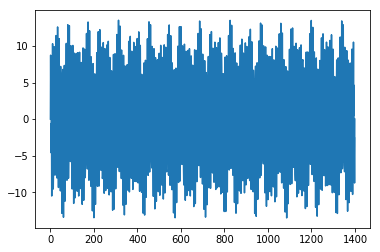

In [461]:
plt.plot(ts)

In [454]:
ts = np.random.rand(200) - 0.5
ts_dft = np.fft.fft(ts)

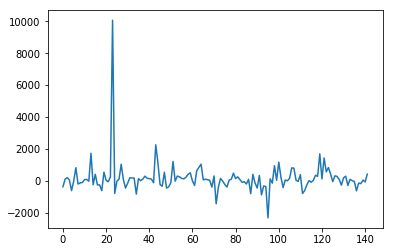

In [508]:
m = len(ts_dft) / 2
Q = ts_dft**2 / m
plt.plot(Q[1:len(Q)//2])
plt.show()

In [324]:
Q[0] == Q.max()

True

In [509]:
H = np.array([])
for i in range(1, math.ceil(len(Q)/2)):
    h = abs((Q[i] - Q[i+1]) + (Q[i] - Q[i-1]))
    H = np.append(H, h)
H_mean = np.mean(H)
H_std = np.std(H)
H_mean, H_std, len(H), H[0] == H.max()

(2319.0233771408975, 6398.203421014791, 143, True)

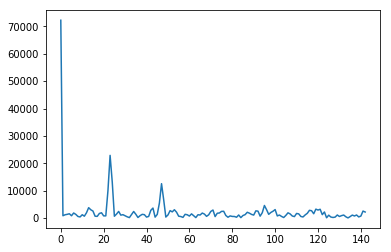

In [510]:
plt.plot(H)

In [421]:
is_period, period = False, 0
for i in range(1, len(H)):
    if H[i] - H_mean > 3*H_std:
        print("i:%d, h_i: %f" % (i, H[i]))
        is_period, period = True, len(H)/(i+1)
is_period, period

i:23, h_i: 22899.880697


(True, 5.958333333333333)

In [422]:
dti = pd.date_range('2018-01-01', periods=287, freq='5min')
df['date'] = dti
df.set_index(['date'], inplace=True)
df.head()

,load
date,
2018-01-01 00:00:00,6
2018-01-01 00:05:00,92
2018-01-01 00:10:00,0
2018-01-01 00:15:00,3
2018-01-01 00:20:00,0


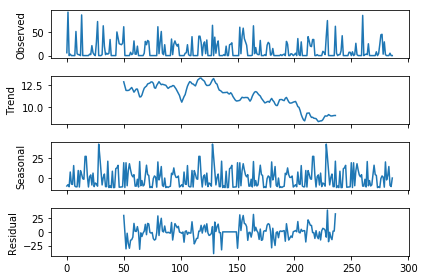

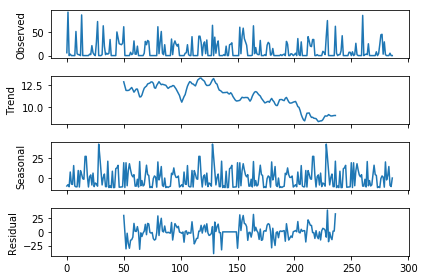

In [462]:
from statsmodels.tsa.seasonal import seasonal_decompose
dec = seasonal_decompose(df['load'], freq=100)
dec.plot()


In [487]:
arr = np.array(list(zip([[1,2,3],1])))
arr

array([[list([1, 2, 3])],
       [1]], dtype=object)

In [437]:
np.vectorize(lambda t: print(t))(arr)

[1, 2, 3]
[1, 2, 3]
1


array([[None],
       [None]], dtype=object)

In [500]:
p = list(map(lambda x: np.array(x), arr))
p

[array([list([1, 2, 3])], dtype=object), array([1], dtype=object)]

In [501]:
np.apply_along_axis(lambda x: np.array(x[0]), 1, arr)

array([[1, 2, 3],
       [1, 1, 1]])